# USP - EACH - SIN5007 - Reconhecimento de Padrões
## Grupo H/8 - Atividade 03 - PCA
### Tratamento do Arquivo Total SPHARM

### 1) Abertura do Arquivo

In [1]:
# Importando e abrindo o arquivo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

dx = pd.read_csv('Total_SPHARM_20200326.csv', header=None)

print(f'Nome do Arquivo: Total_SPHARM_20200326.csv')
print(f'Estrutura do arquivo: \nQuantidade de linhas: {dx.shape[0]} \nQuantidade de Características: {dx.shape[1]}')
dx.head()

Nome do Arquivo: Total_SPHARM_20200326.csv
Estrutura do arquivo: 
Quantidade de linhas: 400 
Quantidade de Características: 718


,0,1,2,3,4,5,6,7,8,9,...,708,709,710,711,712,713,714,715,716,717
0,id001,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,id002,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,id003,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,id004,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,id005,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### 2) Tratamento das colunas de Sexo e Exclusão da primeira coluna

In [7]:
# Transformando a coluna de idade em numérica
dx[1].astype(int)

#Transformando a coluna de classe em numérica
dx[717].astype(int)

print(type(dx[1]), type(dx[717]))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [3]:
#Vamos excluir a primeira coluna que identifica a amostra
df = dx.iloc[:, 1:]
df.columns = range(df.shape[1])

print(f'Estrutura do arquivo: \nQuantidade de linhas: {df.shape[0]} \nQuantidade de Características: {df.shape[1]}')
df.head()

Estrutura do arquivo: 
Quantidade de linhas: 400 
Quantidade de Características: 717


,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
# Calculando a média das colunas
media = list(df.mean(axis=0))
print(media)

[46.5025, 0.31, 0.69, -418477.7345031699, -238191.6853272416, -294377.21223571803, -279254.129347076, -395259.0748773415, -386545.0631034791, -320496.04542661103, -321291.8995961066, -317617.3771350717, -300557.766426285, -433958.39276260196, -167216.32522770308, -393457.17289654876, -229587.36076994418, -309113.02599965874, -207155.35832252877, -369260.6302454016, -266325.41123668035, -354136.8087981998, -296608.83425353345, -433809.13930819894, -473476.9142852042, -407553.45669579215, -155544.57237894385, -396092.4589913009, -303250.00833149784, -274010.8515980122, -361933.65606506064, -417140.93486009276, -191475.91739276145, -371913.53282244335, -353461.81505778874, -258695.5227705884, -347040.14353216864, -209378.1406466286, -252272.68816855497, -344577.7633558064, -399403.0393833805, -230275.19738001612, -249090.04728894916, -267866.3583497345, -349302.8008667502, -266424.34856481367, -344544.7007439413, -184210.1322018978, -446074.3623072209, -368399.4517708924, -281520.29582466

### 3) Ajustando as colunas do arquivo
Nesta parte vamos verificar, por colunas (características), aquelas que não possuem conteúdo, ou que precisam de um ajuste.

In [5]:
# verificando os tipos de dados contidos nas colunas
for col in df.columns:
    print(f'{col}: {df[col].dtype}')

0: float64
1: float64
2: float64
3: float64
4: float64
5: float64
6: float64
7: float64
8: float64
9: float64
10: float64
11: float64
12: float64
13: float64
14: float64
15: float64
16: float64
17: float64
18: float64
19: float64
20: float64
21: float64
22: float64
23: float64
24: float64
25: float64
26: float64
27: float64
28: float64
29: float64
30: float64
31: float64
32: float64
33: float64
34: float64
35: float64
36: float64
37: float64
38: float64
39: float64
40: float64
41: float64
42: float64
43: float64
44: float64
45: float64
46: float64
47: float64
48: float64
49: float64
50: float64
51: float64
52: float64
53: float64
54: float64
55: float64
56: float64
57: float64
58: float64
59: float64
60: float64
61: float64
62: float64
63: float64
64: float64
65: float64
66: float64
67: float64
68: float64
69: float64
70: float64
71: float64
72: float64
73: float64
74: float64
75: float64
76: float64
77: float64
78: float64
79: float64
80: float64
81: float64
82: float64
83: float64
84

#### Colunas Idade, Sexo e Classe

In [8]:
# Coluna de Idade
# Através do MS/Excel (mais fácil) alteramos todos os conteúdos que não eram numéricos 
# para 0 (já havíamos verificado a não existência desta idade).
# Alterando de 0 para a média da idade
for i in range(len(df)):
    if (df.iloc[i, 0] == 0):
        df.iloc[i, 0] = int(media[0])        

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


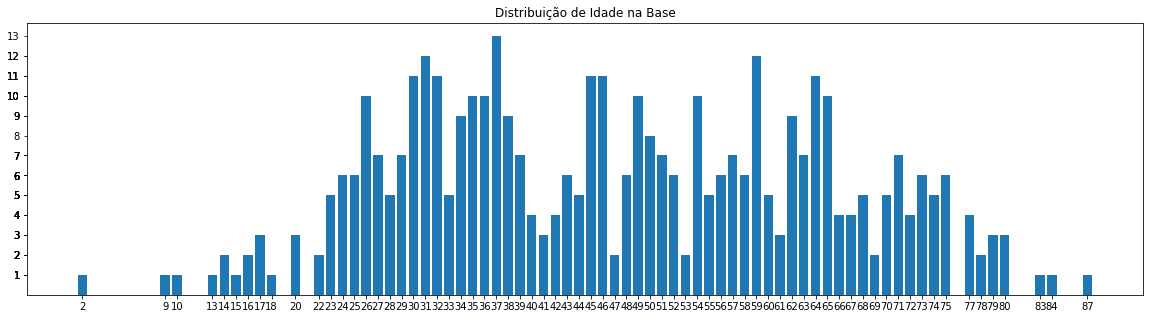

In [10]:
# Vamos verificar a distribuição das idades no modelo
vc = df[0].value_counts()
#print(vc)

# armazena os nomes das classes
cl = list(vc.index)
ncl = list(vc)

# Gráfico de distribuição
plt.figure(figsize=(20, 5))
plt.bar(cl, ncl)
plt.xticks(cl)
plt.yticks(ncl)
plt.title('Distribuição de Idade na Base')
plt.show(True)

In [11]:
# Vamos verificar a média e desvio padrão da Idade
media_Idade = df[0].mean()
desvio_Idade = df[0].std()
print(f'A média das idades da base é: {media_Idade} anos')
print(f'O Desvio Padrão das idades da base é: {desvio_Idade}')

A média das idades da base é: 47.0775 anos
O Desvio Padrão das idades da base é: 17.03487484993307


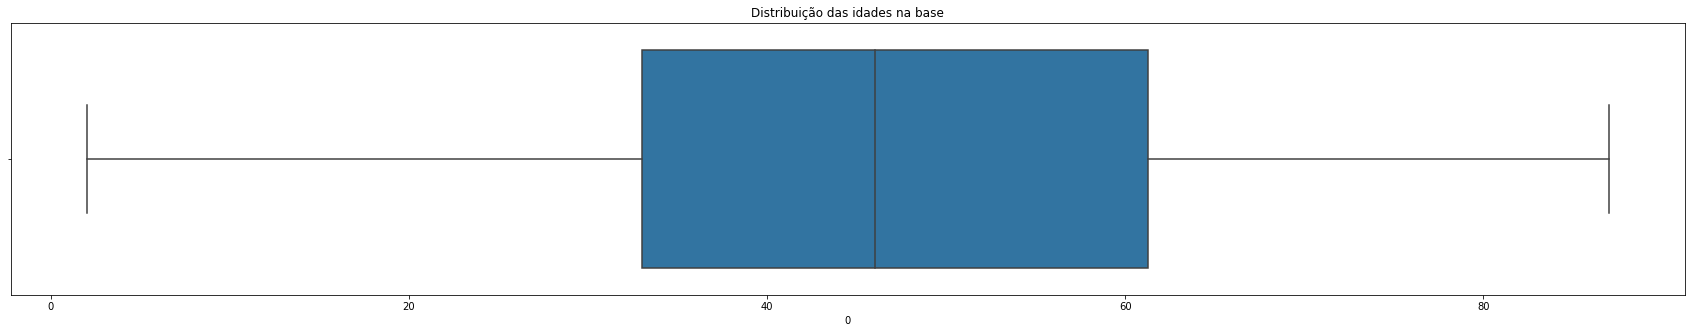

In [12]:
plt.figure(figsize=(30, 5))
sns.boxplot(x=0, data=df)
plt.title('Distribuição das idades na base');

0.0    276
1.0    124
Name: 1, dtype: int64


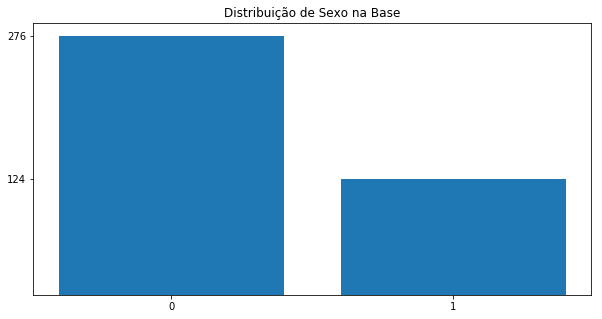

In [13]:
# Coluna de Sexo
# Vamos verificar se existe algum conteúdo diferente de 'M' ou 'F' e a quantidade de ocorrêcia dos mesmos
vc = df[1].value_counts()
print(vc)

# armazena os nomes das classes
cl = list(vc.index)
ncl = list(vc)

# Gráfico de distribuição
plt.figure(figsize=(10, 5))
plt.bar(cl, ncl)
plt.xticks(cl)
plt.yticks(ncl)
plt.title('Distribuição de Sexo na Base')
plt.show(True)

Observamos um predominância de, o dobro, do sexo 'M' em relação ao sexo 'F'.

Se formos considerar este atributo nos modelos, precisamos verificar o impacto que esta predominância provoca.

1.0    183
2.0    116
0.0    101
Name: 716, dtype: int64


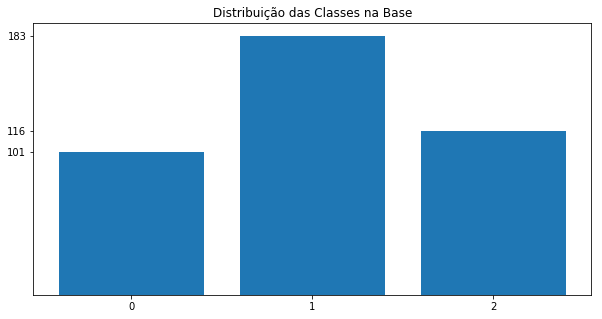

In [15]:
# Coluna da Variável Alvo - Classes: 0, 1, 2
# Vamos verificar se existe algum conteúdo diferente de 0, 1, 2 e a quantidade de ocorrêcia dos mesmos
vc = df[716].value_counts()
print(vc)

# armazena os nomes das classes
cl = list(vc.index)
ncl = list(vc)

# Gráfico de distribuição
plt.figure(figsize=(10, 5))
plt.bar(cl, ncl)
plt.xticks(cl)
plt.yticks(ncl)
plt.title('Distribuição das Classes na Base')
plt.show(True)

A Classe 1 possuí quase dobro a mais de ocorrências na amostra que as demais duas classes.

Isto com certeza irá provocar um desvio dependendo do modelo utilizado.

A tentativa de ajustar as três classes com quantidades de ocorrências iguais, nos traz desafios de interpretação

do modelo da base de dados. 

Táticas Possíveis:

1) A exclusão de metade das ocorrências de Classe 1. 

Como podemos fazer este "corte" sem levar em consideração que as amostras excluídas teriam em suas colunas, 

conteúdos que fizessem real diferença para uma classificação mais próxima.

Uma possível solução seria: Como vamos fazer um Hold-Out (80% Treinamento, 20% Teste), 

uma possibilidade é pegar esta parte excluída das ocorrências da classe 1 e incluí-la na base de teste, junto com a

distribuição. Este acréscimo na base de teste ajudaria a verificar se o modelo treinado, 

consegue explicar melhor a classe 1.

2) Criar novas ocorrências nas Classes 0 e 2, com a média ou moda das respectivas colunas (clones).

Temos que estudar o impacto, pois aplicando o Hold-Out podemos ter a parte de treinamento carregando muito

das ocorrências clonadas e não as originais, e, portanto, puxando o modelo de forma irregular.

Uma possível solução aqui é criar os clones com pequenos ruídos em seus conteúdos numéricos. O que

precisa ser estudado neste caso é se estes ruídos não afetam o conteúdo de maneira a mudá-los de classe.

#### Colunas dos Atributos SPHARM

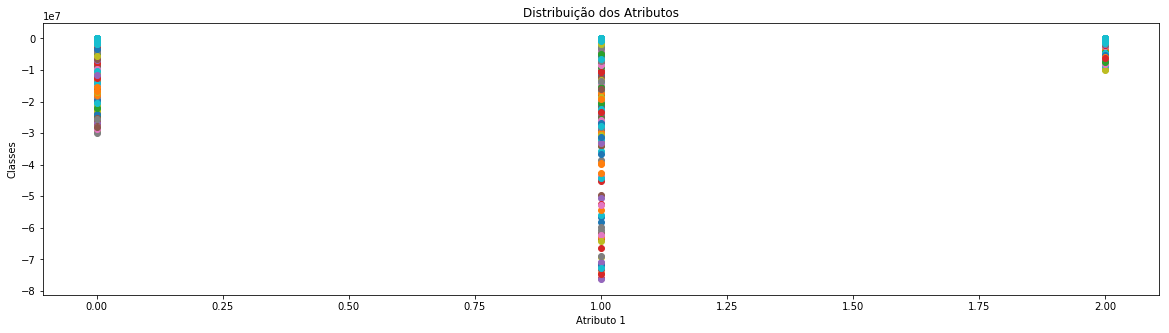

In [16]:
###### Vamos verificar a distribuição dos atributos de SPHARM
# Gráfico de distribuição
plt.figure(figsize=(20, 5))

for i in range(0, 200):
    plt.scatter(df[716], df[i])

plt.ylabel('Classes')
plt.xlabel('Atributo 1')
plt.title('Distribuição dos Atributos')
plt.show(True)

In [18]:
# Verificar a quantidade de amostras por faixa de atributos
fx_atrib = {}

for c in range(len(df.columns)):
    if (c in [0, 1, 2, 716]):
        continue
        
    print(f'Atributo: {c}')
    faixas = {-6.00:0, -3.00:0, 0.00:0, 0.10:0, 1.00:0, 2.00:0, 3.00:0, 4.00:0}

    for l in range(len(df)):
        v = df.iloc[l, c]
        
        if v <= -6.00:
            faixas[-6.00] += 1
        elif v <= -3.00:
            faixas[-3.00] += 1
        elif v <= 0.00:
            faixas[0.00] += 1
        elif v <= 0.10:
            faixas[0.10] += 1
        elif v <= 1.00:
            faixas[1.00] += 1
        elif v <= 2.00:
            faixas[2.00] += 1
        elif v <= 3.00:
            faixas[3.00] += 1
        else:
            faixas[4.00] += 1
    
    fx_atrib[c] = faixas
    
    print(faixas)
   

Atributo: 3
{-6.0: 394, -3.0: 1, 0.0: 5, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 4
{-6.0: 394, -3.0: 3, 0.0: 3, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 5
{-6.0: 396, -3.0: 3, 0.0: 1, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 6
{-6.0: 394, -3.0: 3, 0.0: 3, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 7
{-6.0: 391, -3.0: 5, 0.0: 4, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 8
{-6.0: 398, -3.0: 1, 0.0: 1, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 9
{-6.0: 391, -3.0: 3, 0.0: 6, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 10
{-6.0: 396, -3.0: 3, 0.0: 1, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 11
{-6.0: 390, -3.0: 5, 0.0: 5, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 12
{-6.0: 391, -3.0: 3, 0.0: 6, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 13
{-6.0: 392, -3.0: 4, 0.0: 4, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 14
{-6.0: 389, -3.0: 6, 0.0: 5, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
Atributo: 15
{-6.0: 393

{-6.0: 384, -3.0: 7, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 7}
Atributo: 134
{-6.0: 388, -3.0: 5, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 7}
Atributo: 135
{-6.0: 385, -3.0: 5, 0.0: 3, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 7}
Atributo: 136
{-6.0: 389, -3.0: 2, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 7}
Atributo: 137
{-6.0: 385, -3.0: 2, 0.0: 6, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 7}
Atributo: 138
{-6.0: 387, -3.0: 3, 0.0: 3, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 7}
Atributo: 139
{-6.0: 388, -3.0: 3, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 9}
Atributo: 140
{-6.0: 388, -3.0: 2, 0.0: 1, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 9}
Atributo: 141
{-6.0: 386, -3.0: 2, 0.0: 3, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 9}
Atributo: 142
{-6.0: 386, -3.0: 1, 0.0: 4, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 9}
Atributo: 143
{-6.0: 386, -3.0: 3, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 9}
Atributo: 144
{-6.0: 387, -3.0: 2, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 9}
Atributo: 145
{-6.

{-6.0: 224, -3.0: 2, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 174}
Atributo: 267
{-6.0: 214, -3.0: 4, 0.0: 3, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 179}
Atributo: 268
{-6.0: 214, -3.0: 2, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 182}
Atributo: 269
{-6.0: 213, -3.0: 2, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 185}
Atributo: 270
{-6.0: 212, -3.0: 2, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 186}
Atributo: 271
{-6.0: 209, -3.0: 1, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 188}
Atributo: 272
{-6.0: 209, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 191}
Atributo: 273
{-6.0: 207, -3.0: 0, 0.0: 1, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 192}
Atributo: 274
{-6.0: 207, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 193}
Atributo: 275
{-6.0: 201, -3.0: 1, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 198}
Atributo: 276
{-6.0: 201, -3.0: 1, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 198}
Atributo: 277
{-6.0: 196, -3.0: 4, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0:

{-6.0: 42, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 358}
Atributo: 389
{-6.0: 42, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 358}
Atributo: 390
{-6.0: 42, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 358}
Atributo: 391
{-6.0: 41, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 359}
Atributo: 392
{-6.0: 37, -3.0: 1, 0.0: 2, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 360}
Atributo: 393
{-6.0: 38, -3.0: 1, 0.0: 1, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 360}
Atributo: 394
{-6.0: 40, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 360}
Atributo: 395
{-6.0: 40, -3.0: 0, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 360}
Atributo: 396
{-6.0: 39, -3.0: 1, 0.0: 0, 0.1: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 360}
Atributo: 397


TypeError: '<=' not supported between instances of 'str' and 'float'

#### Eliminação de Colunas

Observamos na lista anterior que temos uma quantidade de atributos com muitos elemntos faltantes.

Se levarmos em conta que temos uma base com 400 linhas vamos tomar como base 10% de elementos faltantes

por atributo é razoável.

Desta maneira vamos desconsiderar as colunas acima da 194, considerando a última coluna que é nossa classe.

Para os elementos vamos utilizar a o valor médio da coluna para preenchimento.

In [20]:
# Criando um novo dataframe com apenas 194 colunas
dx = df.iloc[:, :195]
dx[195] = df.iloc[:, 716]

print(f'Nova base possui {dx.shape[0]} linhas e {dx.shape[1]} colunas')
dx.head()

Nova base possui 400 linhas e 196 colunas


,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,-12496.857522,-22848.427731,-22691.010230,-7827.717382,-2263.959217,-3822.863214,-22098.019430,-9560.519051,-16471.554891,0.0
1,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,-371.460326,-293.878270,-858.115037,-82.880537,-1261.923377,-505.496612,-359.869248,-440.017967,-389.978955,0.0
2,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,-361416.242692,-802108.789114,-342903.434410,-415532.701394,-408822.864411,-518190.767499,-730640.209508,-199785.389230,-546781.070932,0.0
3,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,-522.086637,-233.030710,-551.587639,-413.616578,-66.132582,-811.608167,-621.620823,-488.389220,-300.572949,0.0
4,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,-115.257538,-388.055205,-291.527838,-380.295832,-166.020393,-3.073603,-119.535497,-304.138510,-212.377888,0.0


#### Conteúdos faltantes

In [21]:
# Preenchendo os valores faltantes com as médias das colunas

media = dx.mean(axis=0)

dx.fillna(media, inplace=True)

dx.isna()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Gravação de Arquivo Tratado

In [22]:
# Gravando o arquivo de Saída
dx.to_csv (r'Total_SPHARM_20200403.csv', index = False, header = False)

In [23]:
# Verificando se a gravação foi ok
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dy = pd.read_csv('Total_SPHARM_20200403.csv', header=None)
dy

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,29.0,0.0,1.0,-7.881480e+03,-5.759970e+03,-24465.608592,-1.527511e+04,-2.297438e+04,-2.268614e+04,-6131.488463,...,-1.249686e+04,-2.284843e+04,-2.269101e+04,-7.827717e+03,-2263.959217,-3.822863e+03,-2.209802e+04,-9560.519051,-1.647155e+04,0.0
1,31.0,0.0,1.0,-5.677727e+02,-3.329231e+01,-465.179132,-5.259810e+02,-4.695469e+02,-3.051827e+02,-89.243364,...,-3.714603e+02,-2.938783e+02,-8.581150e+02,-8.288054e+01,-1261.923377,-5.054966e+02,-3.598692e+02,-440.017967,-3.899790e+02,0.0
2,27.0,0.0,1.0,-1.353728e+05,-1.151241e+05,-772665.053883,-2.923314e+05,-5.805926e+04,-1.184643e+05,-585147.837935,...,-3.614162e+05,-8.021088e+05,-3.429034e+05,-4.155327e+05,-408822.864411,-5.181908e+05,-7.306402e+05,-199785.389230,-5.467811e+05,0.0
3,52.0,0.0,1.0,-5.829396e+02,-3.664259e+02,-281.022452,-4.377398e+02,-2.068149e+02,-2.303461e+02,-126.535277,...,-5.220866e+02,-2.330307e+02,-5.515876e+02,-4.136166e+02,-66.132582,-8.116082e+02,-6.216208e+02,-488.389220,-3.005729e+02,0.0
4,56.0,0.0,1.0,-9.130825e+02,-3.342219e+02,-449.102108,-1.136375e+02,-5.006534e+01,-1.271803e+02,-640.351614,...,-1.152575e+02,-3.880552e+02,-2.915278e+02,-3.802958e+02,-166.020393,-3.073603e+00,-1.195355e+02,-304.138510,-2.123779e+02,0.0
5,35.0,1.0,0.0,-1.366224e+02,-2.199550e+02,-58.230194,-4.328410e+01,-5.360079e+01,-2.086418e+02,-237.655295,...,-8.743769e+01,-7.389655e+01,-1.032428e+02,-1.099045e+02,-189.464176,-2.721485e+02,-1.514737e+02,-146.289493,-2.052564e+02,0.0
6,57.0,0.0,1.0,-3.297554e+03,-1.648603e+03,-1826.976716,-1.772262e+03,-3.546650e+03,-1.204975e+03,-5091.387285,...,-1.030802e+03,-3.552043e+03,-3.220067e+03,-1.704418e+03,-2415.661783,-9.563948e+02,-1.548058e+02,-2113.308156,-2.162947e+03,0.0
7,38.0,0.0,1.0,-2.442526e+02,-7.486417e+02,-835.703744,-9.245954e+01,-1.056221e+03,-7.054718e+01,-895.727433,...,-4.451372e+02,-4.344449e+02,-8.612205e+02,-1.747365e+02,-199.659467,-5.181869e+02,-1.899243e+01,-1195.454607,-5.003281e+02,0.0
8,31.0,0.0,1.0,-9.637751e+03,-8.027820e+03,-5467.031364,-1.027926e+04,-5.241849e+02,-3.209580e+03,-1853.923391,...,-9.214094e+03,-4.166412e+03,-5.344750e+03,-6.978892e+03,-7536.520354,-1.281981e+04,-7.071393e+03,-1920.390976,-9.947654e+03,0.0
9,52.0,0.0,1.0,-2.487505e+03,-5.893294e+03,-1921.054444,-6.216152e+03,-4.697064e+03,-4.186356e+03,-2956.721996,...,-1.896325e+03,-5.843948e+03,-2.100723e+05,-2.063982e+05,-159521.858586,-1.298512e+05,-9.916330e+04,-154718.497281,-8.871717e+04,0.0
